# IMPORTING THE LIBRARIES

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

2023-11-14 21:53:19.155126: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-14 21:53:19.178778: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-14 21:53:19.382027: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-14 21:53:19.382064: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-14 21:53:19.383269: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

# LOADING THE DATA

In [2]:
cifar10 = keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_test.shape

(10000, 1)

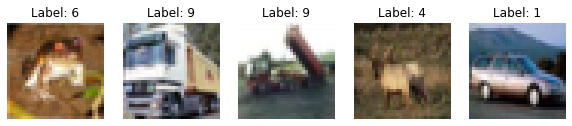

In [7]:
plt.figure(figsize=(10,5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(f"Label: {y_train[i][0]}")
    plt.axis('off')
plt.show()

In [8]:
num_classes = len(set(y_train.flatten()))
num_classes

10

# DATA PREPROCESSING

In [9]:
x_train, x_test = x_train.astype('float32'), x_test.astype('float32')

In [10]:
x_train, x_test = x_train / 255.0, x_test / 255.0

# MODEL ARCHITECTURE

In [11]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=num_classes, activation='softmax')
])

In [12]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# TRAINING THE MODEL

In [13]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.5486 - accuracy: 0.4359 - val_loss: 1.2576 - val_accuracy: 0.5554
Epoch 2/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.2133 - accuracy: 0.5708 - val_loss: 1.0594 - val_accuracy: 0.6315
Epoch 3/10
1563/1563 [==============================] - 21s 14ms/step - loss: 1.0824 - accuracy: 0.6159 - val_loss: 1.0321 - val_accuracy: 0.6428
Epoch 4/10
1563/1563 [==============================] - 21s 13ms/step - loss: 1.0109 - accuracy: 0.6451 - val_loss: 1.0022 - val_accuracy: 0.6463
Epoch 5/10
1563/1563 [==============================] - 24s 15ms/step - loss: 0.9430 - accuracy: 0.6683 - val_loss: 0.9498 - val_accuracy: 0.6688
Epoch 6/10
1563/1563 [==============================] - 41s 26ms/step - loss: 0.8941 - accuracy: 0.6843 - val_loss: 0.9205 - val_accuracy: 0.6829
Epoch 7/10
1563/1563 [==============================] - 49s 31ms/step - loss: 0.8556 - accuracy: 0.6978 - val_loss: 0.9086 -

# EVALUATING THE MODEL

In [17]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 5s 15ms/step - loss: 0.9115 - accuracy: 0.6927


In [18]:
print(f"Test Loss : {test_loss}")
print(f"Test Accuracy : {test_accuracy}")

Test Loss : 0.911507248878479
Test Accuracy : 0.6927000284194946
